In [1]:
#CREATE AND ANALYSE THE NETWORK

import random 
import networkx as nx #LIBRARY TO WORK WITH NETWORKS
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create an ER graph
#Credits Prof. Sandro Meloni.

def er(N,p):
    '''
    This function creates a N,p Erdös and Rényi graph 
    
    Arguments:
    
    1) N: number of nodes in the graph
    
    2) p: connection probability for each couple of nodes 
    
    Output: 
    
    a networkx graph contaning the network
    
    '''
    
    'Creates an empty graph'
    G = nx.Graph()
    
    'adds N nodes'
    G.add_nodes_from(range(N))
    
    edges = set()
    
    for i in range(N):
        
        for j in range(i+1,N):          #undirected graph
            if random.random() < p:
                
                    edges.add((i,j))
    
    G.add_edges_from(edges)
    
    return G
                    
            

In [ ]:
#Create an Barabasi-Albert scale-free network

def ba(N,m, m0=None):
    '''
    This function creates a Scale-free network employing the Barabasi-Albert algorithm  
    
    Arguments:
    
    1) N: number of nodes in the graph
        
    2) m: number of links to be added at each time
    
    Output: 
    
    a networkx graph contaning the network
    
    '''
    
    G = nx.Graph()
    
    m0=5
    'adds m0 (clique) nodes'
    G.add_nodes_from(range(m0))      #m0=5 starting clique
    
    edges = set()

    #initial clique (all connected)
    for i in range(m0):
        for j in range(i+1,m0):          
            edges.add((i,j))
    
    G.add_edges_from(edges)

    
    for i in range(m0, N):           #since at each step we add 1 node, eventually we will have N nodes

        freq=[nx.degree(G, j) for j in range(nx.number_of_nodes(G))]   #define/update connection prob
        freq=np.array(freq)/sum(freq)              #normalize probabilities
        a=range(nx.number_of_nodes(G))
        G.add_node(i)
        newedges=[]

        #extract nodes according to freq
        newlinks=np.random.choice(a, m, False, freq)
        G.add_edges_from(set((i, l) for l in newlinks))

    
    return G
                    
            

In [36]:
def analyzeNet(G):
    '''
    This function calculates the first <k> and second <k2> moments of the degree distribution of a given Graph G
    '''
    
    'Nodes in the graph'
    N = nx.number_of_nodes(G)
    
    'To store the first and the second moment'
    kmean = 0
    kmean2 = 0
    
    'Sums over all the nodes'
    for i in range(N):
        kmean += nx.degree(G,i)
        kmean2 += nx.degree(G,i)*nx.degree(G,i)
        
    'Calculate the mean'
    kmean /= float(N)
    kmean2 /= float(N)
    
    print("mean", kmean)
    print("second moment of the degree distribution", kmean2)
    print("coefficient of variation", math.sqrt(kmean2-kmean**2)/kmean)
    
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = np.bincount(degree_sequence)
    k = np.arange(len(degree_count))
    pk = degree_count / degree_count.sum()

    plt.figure()
    plt.loglog(k[1:], pk[1:], 'bo')  # skip k=0
    plt.xlabel('Degree k')
    plt.ylabel('P(k)')
    plt.title('Degree distribution (log–log)')
    plt.show()
    
    print("number of connected components", nx.number_connected_components(G))
    ccomp= nx.connected_components(G)
    print ("size of connected components") 
    for cc in ccomp:
        print (len(cc))


mean 0.12
second moment of the degree distribution 0.12
coefficient of variation 2.7080128015453204


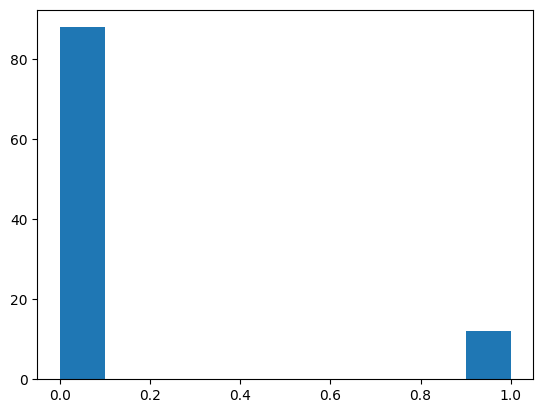

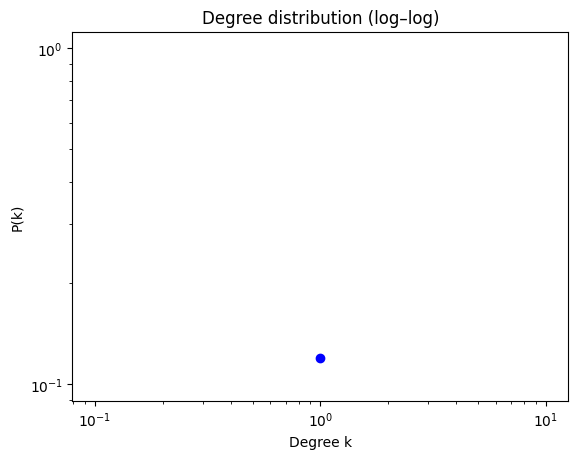

number of connected components 94
size of connected components
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [37]:
'Creates a ER graph and a BA network both with N nodes'
                    
N= 100

'For the ER graph, p must be such as <k> ~ 6,8'
Ger = er(N,0.001)
analyzeNet(Ger)

#nx.draw(Ger)

mean 4.0
second moment of the degree distribution 31.88
coefficient of variation 0.9962429422585637


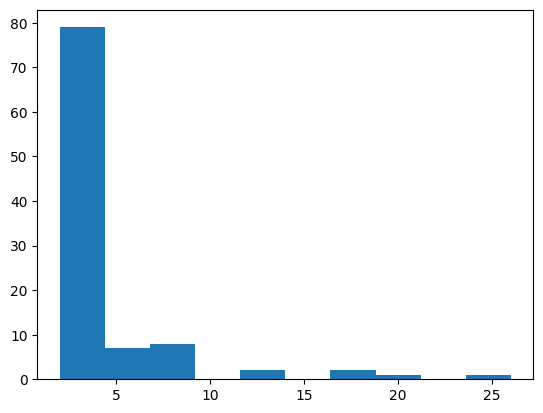

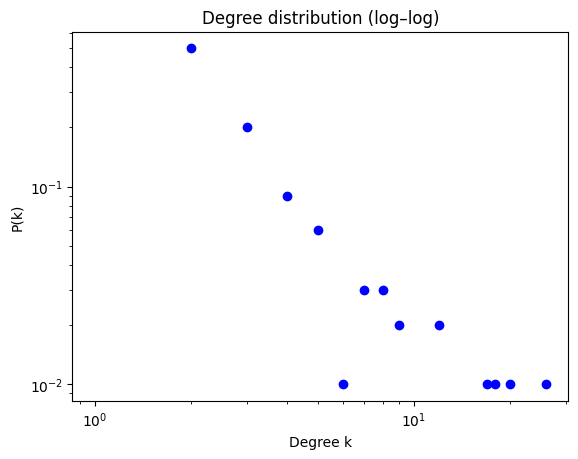

number of connected components 1
size of connected components
100
mean 3.92
second moment of the degree distribution 28.32
coefficient of variation 0.9181405615675097


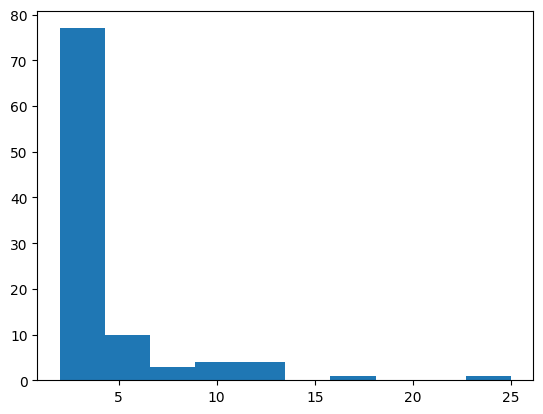

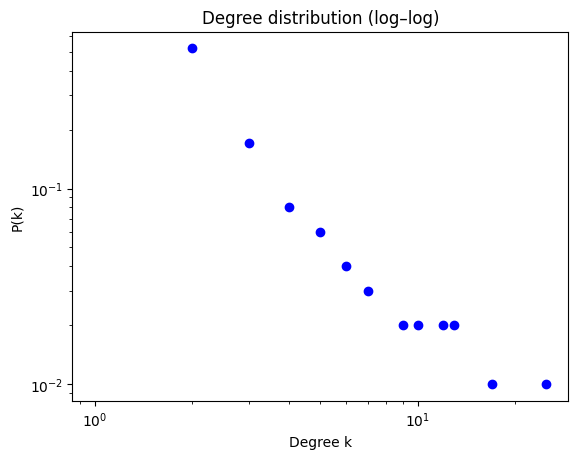

number of connected components 1
size of connected components
100


In [38]:
Gba = ba(N,2)
analyzeNet(Gba)
#nx.draw(Gba)

Gba_test=nx.barabasi_albert_graph(N,2)
analyzeNet(Gba_test)

mean 10.0006
second moment of the degree distribution 110.0704
coefficient of variation 0.31713077335170786


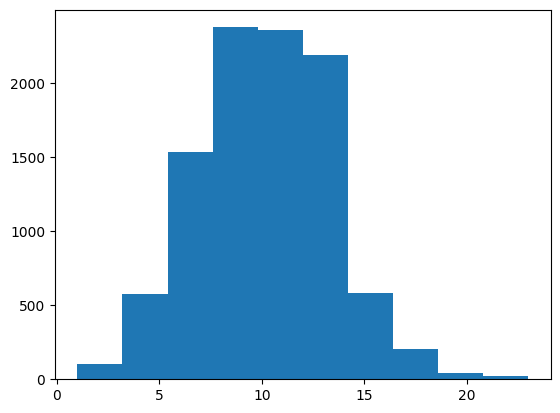

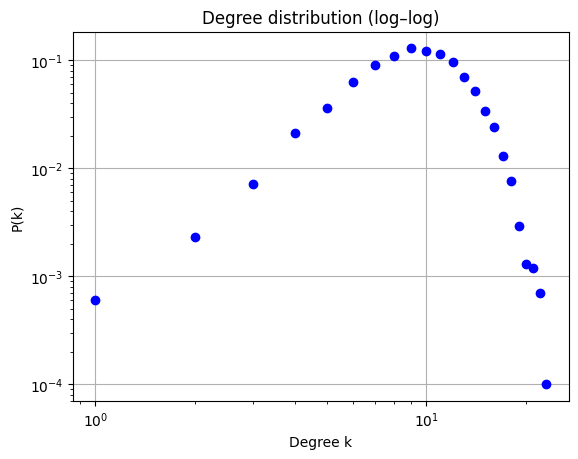

number of connected components 1
size of connected components
10000


In [32]:
'Creates a ER graph and a BA network both with N nodes'
                    
N= 10000

'For the ER graph, p must be such as <k> ~ 6,8'
Ger = er(N,0.001)
analyzeNet(Ger)

# 'For the BA etwork, two links per node are added'
# Gba = ba(N,2)
# analyzeNet(Gba)

since p is low, the ER we have a single connected component and other singletons

mean 4.0
second moment of the degree distribution 58.8962
coefficient of variation 1.6373797665782974


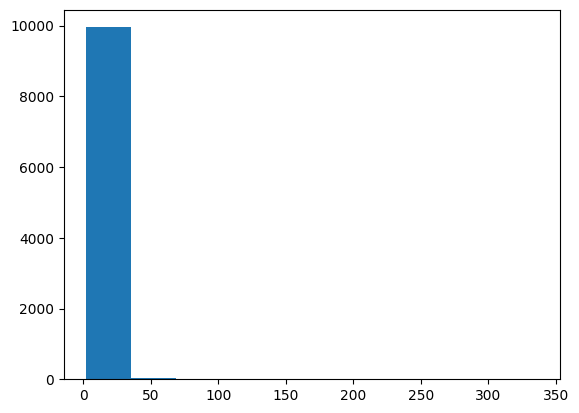

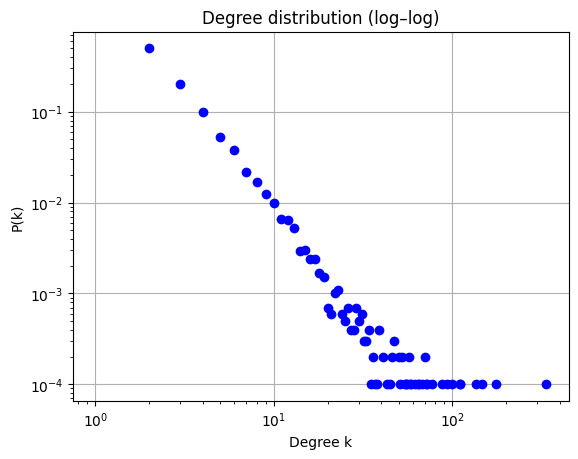

number of connected components 1
size of connected components
10000


In [33]:
Gba = ba(N,2)
analyzeNet(Gba)